In [10]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import figure
import pandas as pd
import pandasql as ps
from bokeh.plotting import figure, output_file, show
from bokeh.charts import Bar,Line,TimeSeries, show, output_file, vplot,Step
from bokeh.palettes import brewer
from bokeh.models import HoverTool
palette = brewer["Blues"][3]

output_file("censor.html")

movies = pd.read_excel('C:\Users\shehnaz\Desktop\Shehnaz\STUDY\Data Programming for Analytics\master.xlsx')

data=pd.DataFrame()
movies.head()
data=movies[['id','censor','releasemonth','year','releasemonthnum']]
p=Bar(data,label='year',values='id',agg='count',group='censor',
      title="number of movies released per censor", xlabel='Year', ylabel='Number of Movies', legend='top_right')

tab1 = Panel(child=p, title="overall")      

#2015

q2="""select * from data where year = 2015 """
a=pd.DataFrame()
a=ps.sqldf(q2,locals())

p1=Bar(a,label='censor',values='id',agg='count',
      title="number of movies released per censor", xlabel='Censor',
      ylabel='Number of Movies',palette=palette
     )

tab2 = Panel(child=p1, title="2015")

#2014

q2="""select * from data where year = 2014 """
a=pd.DataFrame()
a=ps.sqldf(q2,locals())

p1=Bar(a,label='censor',values='id',agg='count',
      title="number of movies released per censor", xlabel='Censor',
      ylabel='Number of Movies',palette=palette
     )

tab3 = Panel(child=p1, title="2014")


#time series

data=movies[['id','censor','releasemonth','year','releasemonthnum']]

q3="""select censor,year,count(*) as count from data group by censor,year"""
a1=pd.DataFrame()
a1=ps.sqldf(q3,locals())

b=a1

year3=b[b.censor=='PG-13']['year']
year3.reset_index(drop=True,inplace=True)
R1=b[b.censor=='R']['count']
R1.reset_index(drop=True,inplace=True)
G1=b[b.censor=='G']['count']
G1.reset_index(drop=True,inplace=True)
NC171=b[b.censor=='NC-17']['count']
PG1=b[b.censor=='PG']['count']
PG1.reset_index(drop=True,inplace=True)
PG131=b[b.censor=='PG-13']['count']
PG131.reset_index(drop=True,inplace=True)
NotRated1=b[b.censor=='Not Rated']['count']

data=dict(
year=year3,
R=R1,
PG=PG1,
PG13=PG131,
G=G1,
)




tsline = TimeSeries(data,
    x='year', y=['R','PG','PG13','G'],
    color=['R','PG','PG13','G'], dash=['R','PG','PG13','G'],
    title="Timeseries", ylabel='Censor', legend=True)


tab4 = Panel(child=tsline, title="Time Series - Line")


#time series - point
hover = HoverTool(
        tooltips=[
            ("Year", "$x"),
            ("Value", "$y"),
       ]
    )
    


tspoint = TimeSeries(data,
    x='year', y=['R','PG','PG13','G'],
    color=['R','PG','PG13','G'], dash=['R','PG','PG13','G'],
    builder_type='point', title="Timeseries Points",
    ylabel='Censor', legend=True,tools=[hover])



tab5 = Panel(child=tspoint, title="Time Series - Point")


tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5 ])

show(tabs)

<IPython.core.display.Javascript object>


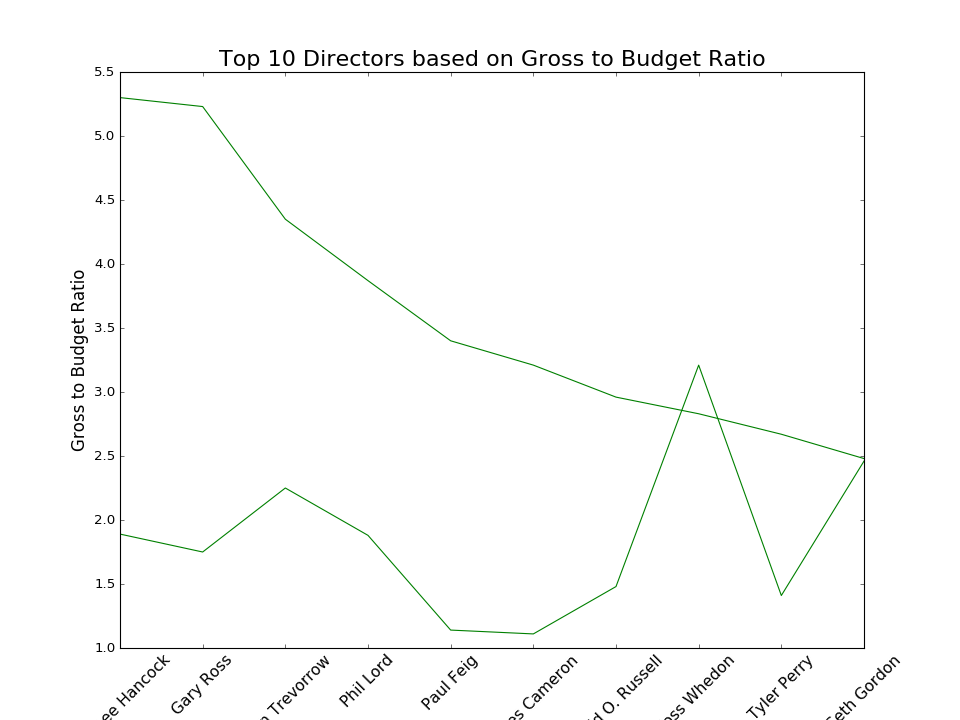

In [9]:
import pandas as pd
from operator import itemgetter
from collections import OrderedDict
from bokeh.charts import Bar,Line
from ggplot import *
import warnings
warnings.simplefilter("ignore",Warning)

%matplotlib notebook

movies = pd.DataFrame()
data = pd.read_excel("C:\Users\shehnaz\Desktop\Shehnaz\STUDY\Data Programming for Analytics\master.xlsx", "Sheet1")
movies = movies.append(data)

directorGross = dict()
directorBudget = dict()
directorMovieCount = dict()


for index, row in movies.iterrows():
    #print (index)
    if not pd.isnull(row["director 1"]):
        director = row["director 1"]
        if unicode(row["gross"]).isnumeric():
            gross = float(row["gross"])
        if unicode(row["budget"]).isnumeric():
            budget = float(row["budget"])
        directorGross[director] = directorGross.get(director,0)+gross
        directorBudget[director] = directorBudget.get(director,0)+budget
        directorMovieCount[director] = directorMovieCount.get(director,0)+1

directorGross = OrderedDict(sorted(directorGross.items(), key=itemgetter(1), reverse = True))
directorBudget = OrderedDict(sorted(directorBudget.items(), key=itemgetter(1), reverse = True))
directorMovieCount = OrderedDict(sorted(directorMovieCount.items(), key=itemgetter(1), reverse = True))

topDirectorGross = list(directorGross.items())[:50]
topDirectorBudget = list(directorBudget.items())[:50]
topDirectorMovieCount = list(directorMovieCount.items())[:50]

directorDF = pd.DataFrame(columns=('director', 'totalGross', 'totalBudget', 'totalMovieCount', 'averageGross', 'averageBudget', 'gross2BudgetRatio'))
for i in range(len(topDirectorGross)):
    director = topDirectorGross[i][0]
    directorDF.loc[i] = [director, directorGross[director], directorBudget[director], directorMovieCount[director], float(directorGross[director]/directorMovieCount[director]), float(directorBudget[director]/directorMovieCount[director]), float((directorGross[director]/directorMovieCount[director])/(directorBudget[director]/directorMovieCount[director]))]

directorDFSortedByGross =  directorDF[:10]    
directorDFSortedByRatio = directorDF.sort("gross2BudgetRatio", ascending = False)[:10]
directorDFSortedByAvgGross = directorDF.sort("averageGross", ascending = False)[:10]    
directorDFSortedByAvgBudget = directorDF.sort("averageBudget", ascending = False)[:10]    


z=directorDFSortedByGross['director'].tolist()
z1=directorDFSortedByRatio['director'].tolist()
y=directorDFSortedByGross['gross2BudgetRatio'].tolist()
y1=directorDFSortedByRatio['gross2BudgetRatio'].tolist()
#b=[]
d=[]
e=[]
#for item in range(0,len(x)):
#    a=x[item]
#    a=int(round(a/1000000,0))
#    b.append(a)
for item in range(0,len(y)):    
    c=y[item]
    c=round(c,2)
    f=y1[item]    
    f=round(f,2)    
    d.append(c)
    e.append(f)    

#director=pd.DataFrame()
#ratio=pd.DataFrame()
#director=directorDFSortedByGross['director']
#ratio['ratio']=d
#dir1=pd.concat([director,ratio],axis=1)

x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
from matplotlib import pyplot as plt
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=9
plt.rcParams["figure.figsize"]=fig_size
plt.xticks(x,z,rotation=45)
plt.plot(x,d,"g")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(z,rotation=45,fontsize=14)
plt.xlabel("Directors",fontsize=15)
plt.ylabel("Gross to Budget Ratio",fontsize=15)
plt.title("Gross to Budget Ratio for Top 10 Grossed Directors",fontsize=20)


x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=9
plt.rcParams["figure.figsize"]=fig_size
plt.xticks(x, z1,rotation=45)
plt.plot(x,e,"g")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(z1,rotation=45,fontsize=14)
plt.xlabel("Directors",fontsize=15)
plt.ylabel("Gross to Budget Ratio",fontsize=15)
plt.title("Top 10 Directors based on Gross to Budget Ratio",fontsize=20)

plt.show()